# Assignment 2: Programming MLPs in Keras and PyTorch

We will use the Bank Marketing Data Set from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, losses, metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.regularizers import L2


ModuleNotFoundError: No module named 'tensorflow'

## Load the dataset
Load the bank-additional dataset: 

In [6]:
data_path="./bank-additional-full.csv"

df = pd.read_csv(data_path, sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

Does the dataset has imbalance in its label classes?

In [9]:
df.y.value_counts()/len(df.y)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Let's convert categorical variables to dummy and also seperate the X and y:

In [10]:
X = df.copy()
del X['y']
X = pd.get_dummies(X, drop_first=True)
y = np.where(df.y == "yes", 1, 0)

## Keras

Split into 20\% validation and th rest test:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,        
                                    test_size = 0.2, random_state = 1)

Standardize the input values using a standard scaler

In [12]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Define a model in Keras with two hidden layers of size 10 and 8 with a ReLU activation function. The output layer will be sigmoid. use adam optimizer and binary_cross entropy with accuracy metrics. Run the training for 10 epochs.

In [13]:
batch_size = 20
epochs = 10

model = Sequential()
#CODE HERE
# write code to define the model and fit the model
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam'
              )

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))


Epoch 1/10


2023-04-10 05:36:16.824269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-10 05:36:16.824341: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 05:36:16.824370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3e130c7f9eda): /proc/driver/nvidia/version does not exist
2023-04-10 05:36:16.824600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1648/1648 [==============================] - 5s 2ms/step - loss: 2.6446 - accuracy: 0.8717 - val_loss: 0.3206 - val_accuracy: 0.9006
Epoch 2/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4337 - accuracy: 0.8849 - val_loss: 0.8071 - val_accuracy: 0.7406
Epoch 3/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4075 - accuracy: 0.8847 - val_loss: 0.2308 - val_accuracy: 0.9053
Epoch 4/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4520 - accuracy: 0.8849 - val_loss: 0.3391 - val_accuracy: 0.8926
Epoch 5/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8859 - val_loss: 0.4127 - val_accuracy: 0.9030
Epoch 6/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4226 - accuracy: 0.8877 - val_loss: 0.2929 - val_accuracy: 0.9041
Epoch 7/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8879 - val_loss: 0.2982 - val_accuracy: 0.8909
Epo

In [14]:
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5032514929771423
Test accuracy: 0.7486040592193604


Plot the train and validation over the number of epoch

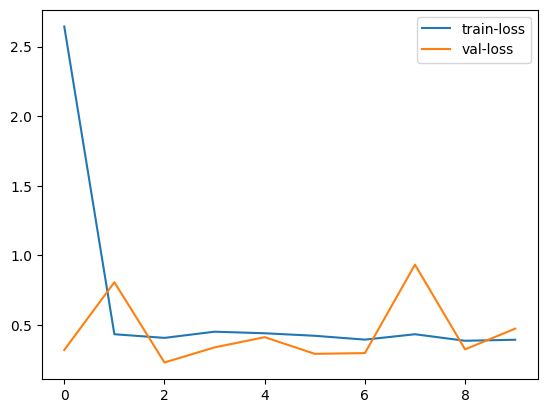

In [15]:
plt.plot(history.history['loss'], label="train-loss")
plt.plot(history.history['val_loss'], label="val-loss")
plt.legend()
plt.show()

### Regularization
Regularize the model above using dropouts(0.2 parameter)and early stopping (patience=2). Train the model and compare the performance.

In [16]:
batch_size = 20
epochs = 100

model = Sequential()
# add early stopping and dropouts to your previous model code
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam'
              )

# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# train the model with dropout and early stopping
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
1648/1648 [==============================] - 4s 2ms/step - loss: 5.1141 - accuracy: 0.8431 - val_loss: 0.4211 - val_accuracy: 0.8854
Epoch 2/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8833 - val_loss: 0.3638 - val_accuracy: 0.8854
Epoch 3/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3496 - accuracy: 0.8877 - val_loss: 0.3565 - val_accuracy: 0.8854
Epoch 4/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3476 - accuracy: 0.8877 - val_loss: 0.3562 - val_accuracy: 0.8854
Epoch 5/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3426 - accuracy: 0.8870 - val_loss: 0.3480 - val_accuracy: 0.8854
Epoch 6/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3271 - accuracy: 0.8880 - val_loss: 0.3356 - val_accuracy: 0.8854
Epoch 7/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3228 - accuracy: 0.8907 - val_loss: 0.3299 - val_ac

In [17]:
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.36135053634643555
Test accuracy: 0.8824957609176636


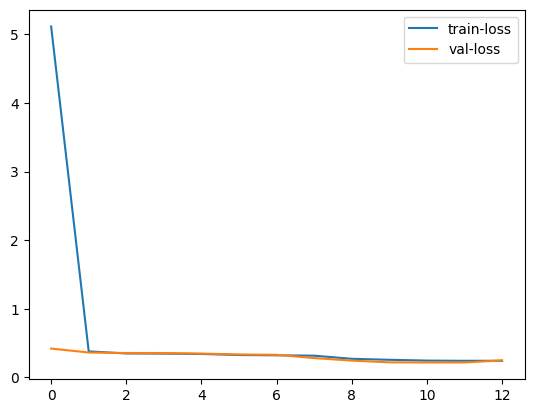

In [18]:
plt.plot(history.history['loss'], label="train-loss")
plt.plot(history.history['val_loss'], label="val-loss")
plt.legend()
plt.show()

Now, Regularize the model using early-stopping and kernel and bias regularizers (L2). Train the model and compare the performance.

In [19]:
batch_size = 20
epochs = 100

model_l2 = Sequential()
# add early stopping and dropouts to your previous model code
model_l2.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.02), bias_regularizer=regularizers.l2(0.2)))
model_l2.add(Dropout(rate=0.2))
model_l2.add(Dense(8, activation='relu',
          kernel_regularizer=regularizers.l2(0.02), bias_regularizer=regularizers.l2(0.2)))
model_l2.add(Dropout(rate=0.2))
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam'
              )

# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# train the model with dropout and early stopping
history_l2 = model_l2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
1648/1648 [==============================] - 4s 2ms/step - loss: 7.6642 - accuracy: 0.8556 - val_loss: 0.5078 - val_accuracy: 0.8854
Epoch 2/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.5365 - accuracy: 0.8871 - val_loss: 0.4530 - val_accuracy: 0.8854
Epoch 3/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8877 - val_loss: 0.4293 - val_accuracy: 0.8854
Epoch 4/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4117 - accuracy: 0.8879 - val_loss: 0.4037 - val_accuracy: 0.8854
Epoch 5/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3862 - accuracy: 0.8880 - val_loss: 0.3797 - val_accuracy: 0.8854
Epoch 6/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8881 - val_loss: 0.3642 - val_accuracy: 0.8854
Epoch 7/100
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8878 - val_loss: 0.3581 - val_ac

In [20]:
score_l2 = model_l2.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score_l2[0])
print('Test accuracy:', score_l2[1])

Test loss: 0.36481648683547974
Test accuracy: 0.8854090571403503


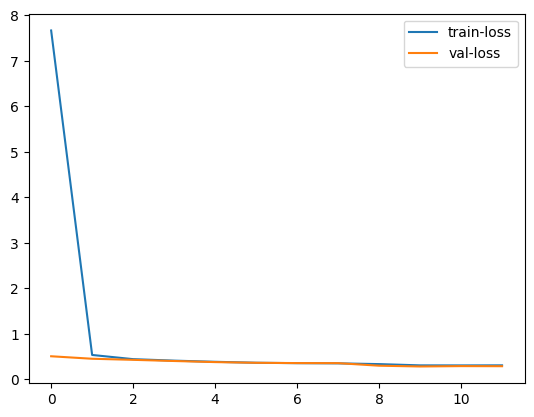

In [21]:
plt.plot(history_l2.history['loss'], label="train-loss")
plt.plot(history_l2.history['val_loss'], label="val-loss")
plt.legend()
plt.show()

In [22]:
print(f"Without l2 regularization the score is {score}")
print(f"by adding l2 regularization we get a score of {score_l2}")
print(f"Test Lost improves {score_l2[0] -  score[0]}")
print(f"Test Accuracy improves {score_l2[1] -  score[1]}")

Without l2 regularization the score is [0.36135053634643555, 0.8824957609176636]
by adding l2 regularization we get a score of [0.36481648683547974, 0.8854090571403503]
Test Lost improves 0.0034659504890441895
Test Accuracy improves 0.0029132962226867676


### Batch Normalization
Batch normalization standardize the inputs to a layer in a deep learning neural network. It helps accelerating the training process and might even improve the performance of the model via a regularization effect. 
Add Batch Normalizations to the original network and train the model and compare the performance.

In [23]:
batch_size = 20
epochs = 10

model_batch_regular = Sequential()
#CODE HERE
# write code to define the model and fit the model
model_batch_regular.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model_batch_regular.add(BatchNormalization())
model_batch_regular.add(Dense(8, activation='relu'))
model_batch_regular.add(BatchNormalization())
model_batch_regular.add(Dense(1, activation='sigmoid'))

model_batch_regular.compile(loss='binary_crossentropy',
                            metrics=['accuracy'],
                            optimizer='adam'
                            )

history_batch_regular = model_batch_regular.fit(X_train, y_train,
                                                batch_size=batch_size,
                                                epochs=epochs,
                                                verbose=1,
                                                validation_data=(X_test, y_test))


Epoch 1/10
1648/1648 [==============================] - 5s 3ms/step - loss: 0.2925 - accuracy: 0.8865 - val_loss: 0.2825 - val_accuracy: 0.8929
Epoch 2/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2159 - accuracy: 0.9047 - val_loss: 0.2505 - val_accuracy: 0.8979
Epoch 3/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2125 - accuracy: 0.9042 - val_loss: 0.3888 - val_accuracy: 0.8865
Epoch 4/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2088 - accuracy: 0.9040 - val_loss: 0.2328 - val_accuracy: 0.8975
Epoch 5/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2044 - accuracy: 0.9051 - val_loss: 1.0971 - val_accuracy: 0.8858
Epoch 6/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2039 - accuracy: 0.9054 - val_loss: 0.2190 - val_accuracy: 0.9098
Epoch 7/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2037 - accuracy: 0.9059 - val_loss: 0.2822 - val_accuracy:

Test loss: 31.50300407409668
Test accuracy: 0.18001942336559296


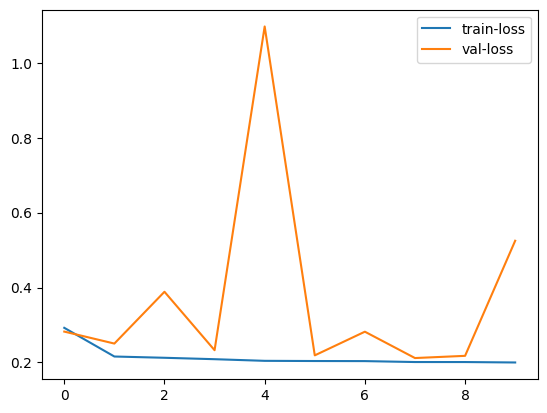

Without batch regularization the score is [0.36135053634643555, 0.8824957609176636]
by adding batch regularization we get a score of [31.50300407409668, 0.18001942336559296]
Test Lost improves 31.141653537750244
Test Accuracy improves -0.7024763375520706


In [24]:
score_batch_regular = model_batch_regular.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score_batch_regular[0])
print('Test accuracy:', score_batch_regular[1])
plt.plot(history_batch_regular.history['loss'], label="train-loss")
plt.plot(history_batch_regular.history['val_loss'], label="val-loss")
plt.legend()
plt.show()
print(f"Without batch regularization the score is {score}")
print(f"by adding batch regularization we get a score of {score_batch_regular}")
print(f"Test Lost improves {score_batch_regular[0] -  score[0]}")
print(f"Test Accuracy improves {score_batch_regular[1] -  score[1]}")

## PyTorch
Create the same original model that you developed in Keras using PyTorch this time:

In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim import SGD
from torch.nn import BCELoss
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from numpy import vstack
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [27]:
X_tensor = torch.Tensor(X_std.astype('float32'))
y_tensor = torch.Tensor(y.astype('float32'))

In [28]:
class MyDataset(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y
 
    def __len__(self):
        return len(self.X)
 
    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

In [29]:
test_size = round(0.2 * len(df))
train_size = len(df) - test_size     
train,test=random_split(MyDataset(X_tensor,y_tensor),[train_size, test_size])

In [30]:
train_dl = DataLoader(train, batch_size=20, shuffle=True)
test_dl = DataLoader(test, batch_size=100, shuffle=False)

In [31]:
X_tensor.shape

torch.Size([41188, 53])

In [32]:
y_tensor.shape

torch.Size([41188])

In [33]:
len(train)

32950

In [34]:
class bank_marketing_MLP(nn.Module): 

   def __init__(self): 
      super(bank_marketing_MLP, self).__init__()
      self.fc1 = nn.Linear(53, 10)
      self.fc2 = nn.Linear(10, 8)
      self.fc3 = nn.Linear(8, 1)
      self.relu = nn.ReLU()
      self.sigmoid = nn.Sigmoid()


   def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.relu(x)
      x = self.fc3(x)
      x = self.sigmoid(x)
      return x


In [35]:
def train_model(train_dl, model):
    # define the optimization and loss
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

    for epoch in range(15):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            
            # compute the model predictions
            outputs = model(inputs)
            
            # calculate the loss
            loss = criterion(outputs, targets.unsqueeze(1))
            
            # credit assignment
            loss.backward()
            
            # update model weights
            optimizer.step()
        print(f'epoch {epoch} loss {loss}')



In [36]:
model = bank_marketing_MLP()
train_model(train_dl, model)

epoch 0 loss 0.571310818195343
epoch 1 loss 0.15095874667167664
epoch 2 loss 0.07455188035964966
epoch 3 loss 0.05583879351615906
epoch 4 loss 0.30494171380996704
epoch 5 loss 0.13488610088825226
epoch 6 loss 0.08476319164037704
epoch 7 loss 0.09272108972072601
epoch 8 loss 0.17622879147529602
epoch 9 loss 0.20769202709197998
epoch 10 loss 0.0012301490642130375
epoch 11 loss 0.4996981620788574
epoch 12 loss 0.12232308089733124
epoch 13 loss 0.09244941174983978
epoch 14 loss 0.030538782477378845


In [37]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [38]:
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)


Accuracy: 0.911


In [39]:
def predict(row, model):
    row = torch.Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

## Hyper Parameter Tunning (optional bonus points)

Find the optimal parameter for the following range of values:
- Number of units at hidden layers=[10,8,6,1], [20,16,12,1],[40,32,24,1]
- Number of hidden layers=[1,2,3]
- Batch size=[20,50,100]
- with/without Batch normalization
- Activation functions=[Relu,tanh,sigmoid, softplus]
- optimizers=[SGD,RMSprop,Adam]
- Learning rate=[0.01,0.05,0.1]
- With or without ExponentialDecay learning rate scheduler

What is the validation accuracy of the optimal model?

In [40]:
import itertools
from typing import List
from torch.optim import RMSprop, Adam, lr_scheduler

In [41]:
class bank_marketing_MLP(nn.Module): 

   def __init__(self, input_size: int, hidden_units: List[int],
                      num_hidden_layers: int, activation: str,
                      batch_norm: bool):
      """
      improved version for grid search

      :param input_size: The number of input features.
      :param hidden_units: The number of units in each hidden layer.
      :param num_hidden_layers: The number of hidden layers in the model.
      :param activation: string corresponding to The activation function to use between layers.
      :param batch_norm: Whether or not to use batch normalization between layers.
      """
      super(bank_marketing_MLP, self).__init__()

      self.input_size = input_size
      self.hidden_units = hidden_units
      self.num_hidden_layers = num_hidden_layers
      self.batch_norm = batch_norm
      self.activation = activation

      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, self.hidden_units[0]))
      
      # check to see if batch norm is used
      if self.batch_norm:
         self.layers.append(nn.BatchNorm1d(self.hidden_units[0]))
      self.layers.append(self.activation())

      for i in range(self.num_hidden_layers - 1): # -1 since we already have one hidden layer
         self.layers.append(nn.Linear(self.hidden_units[i], self.hidden_units[i+1]))
         if self.batch_norm:
            self.layers.append(nn.BatchNorm1d(self.hidden_units[i]))
         self.layers.append(self.activation())

      self.layers.append(nn.Linear(self.hidden_units[self.num_hidden_layers-1], 1))
      self.layers.append(nn.Sigmoid())

   def forward(self, x):
      for layer in self.layers:
         x = layer(x)
      return x

In [42]:
def get_data_loaders(train_df, test_df, batch_size):
    train_dl = DataLoader(train_df, batch_size=batch_size, shuffle=True)
    test_dl = DataLoader(test_df, batch_size=100, shuffle=False)
    return train_dl, test_dl

In [43]:
# setup inital values for grid search
hidden_units_list = [[10, 8, 6, 1], [20, 16, 12, 1], [40, 32, 24, 1]]
num_hidden_layers_list = [1, 2, 3]
batch_size_list = [20, 50, 100]
use_bn_list = [True, False]
activation_list = [nn.ReLU, nn.Tanh, nn.Sigmoid, nn.Softplus]
optimizer_list = [SGD, RMSprop, Adam]
learning_rate_list = [0.01, 0.05, 0.1]
use_lr_scheduler_list = [True, False]

best_hidden_units = None
best_hidden_layers = None
best_batch_size = None
best_batch_norm = None
best_activation = None
best_optimizer = None
best_learning_rate = None
best_scheduler = None
best_val_acc = 0.0

In [44]:
def train_model(model, train_loader, test_loader, 
                criterion, optimizer, scheduler):
    for epoch in range(15):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_loader):
            # clear the gradients
            optimizer.zero_grad()
            
            # compute the model predictions
            outputs = model(inputs)
            
            # calculate the loss
            loss = criterion(outputs, targets.unsqueeze(1))
            
            # credit assignment
            loss.backward()
            
            # update model weights
            optimizer.step()
            if scheduler is not None:
                scheduler.step()

    acc = evaluate_model(test_loader, model)
    return acc


In [48]:
for params in itertools.product(hidden_units_list, num_hidden_layers_list, batch_size_list, 
                                use_bn_list, activation_list, optimizer_list, learning_rate_list,
                                use_lr_scheduler_list):
    hidden_units, num_hidden_layers, batch_size, use_bn, activation, optimizer, learning_rate, use_lr_scheduler = params
    
    # defines the model using new model defs
    model = bank_marketing_MLP(53, hidden_units, num_hidden_layers, activation, use_bn)
    
    # loss functiona nd opemizer is defined
    criterion = nn.BCELoss()
    optimizer = optimizer(model.parameters(), lr = learning_rate)

    # need new data loaders
    
    train_loader, test_loader = get_data_loaders(train, test, batch_size)
    if use_lr_scheduler:
        scheduler = lr_scheduler.ExponentialLR(optimizer, gamma = 0.1)
    else:
        scheduler = None
    value_accuracy = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler)
    if value_accuracy > best_val_acc:
        best_hidden_units = hidden_units
        best_hidden_layers = num_hidden_layers
        best_batch_size = batch_size
        best_batch_norm = use_bn
        best_activation = activation
        best_optimizer = type(optimizer).__name__
        best_learning_rate = learning_rate
        best_scheduler = use_lr_scheduler
        best_val_acc = value_accuracy
        print(f"Best hidden units = {best_hidden_units}")
        print(f"Best hidden layers = {best_hidden_layers}")
        print(f"best_batch_size = {best_batch_size}")
        print(f"best_batch_size = {best_batch_norm}")
        print(f"best_batch_size = {best_activation}")
        print(f"best_batch_size = {best_optimizer}")
        print(f"best_batch_size = {best_learning_rate}")
        print(f"best_batch_size = {best_scheduler}")
        print(f"best_batch_size = {best_val_acc}")

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.01
    lr: 0.0
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Best hidden units = [10, 8, 6, 1]
Best hidden layers = 1
best_batch_size = 20
best_batch_size = True
best_batch_size = <class 'torch.nn.modules.activation.ReLU'>
best_batch_size = SGD
best_batch_size = 0.01
best_batch_size = True
best_batch_size = 0.1389900461277009


In [47]:
print(SGD.__name__)

SGD
